In [161]:
import sympy
from sympy import *
from sympy.vector import *
N = CoordSys3D('N')

In [162]:
sympy.init_printing()

In [178]:
x, y = symbols('x y')

f1, f2 = symbols('f1 f2', integer=True)

m1, n1 = symbols('m1 n1', integer=True)
m2, n2 = symbols('m2 n2', integer=True)

a1, b1, c1 = symbols('a1 b1 c1', integer=True)
a2, b2, c2 = symbols('a2 b2 c2', integer=True)

k1, k2, k3 = symbols('k1 k2 k3', integer=True)
v1, v2, v3 = symbols('v1 v2 v3', integer=True)

j1, j2, j3 = symbols('j1 j2 j3', integer=True)
u1, u2, u3 = symbols('u1 u2 u3', integer=True)


## Poly Type

### Scale Conv 

In [179]:
scale_fx = f1*x
scale_gx = f2*x
scale_fx

In [180]:
linear_fx = m1*x + n1
linear_gx = m2*x + n2
linear_fx

In [181]:
poly3_fx = a1 + b1*x + c1*Pow(x,2)
poly3_gx = a2 + b2*x + c2*Pow(x,2)
poly3_fx

In [316]:
lltable_gx = (k1 > x)
lltable_gx

In [296]:
def preCalcFromTo(f, g):
  print("f=", f, " to ", "g=", g )
  res = compose(g,fa)
  display(res)
  return res
def print_ncode(x):
  return repr(x).replace("**", "^")

## combines

### scaleconv

In [297]:
scale_to_scale = preCalcFromTo(scale_fx, scale_gx)

f= f1*x  to  g= f2*x


In [298]:
scale_to_lin = preCalcFromTo(scale_fx, linear_gx)

f= f1*x  to  g= m2*x + n2


In [299]:
scale_to_poly3 = preCalcFromTo(scale_fx, poly3_gx)

f= f1*x  to  g= a2 + b2*x + c2*x**2


In [300]:
scale_to_lltable = lltable_gx.subs(x, scale_fx)
scale_to_lltable

In [301]:
simplify(scale_to_lltable)

### linconv 

In [302]:
lin_to_scale = preCalcFromTo(linear_fx, scale_gx)

f= m1*x + n1  to  g= f2*x


In [303]:
lin_to_lin = preCalcFromTo(linear_fx, linear_gx)

f= m1*x + n1  to  g= m2*x + n2


In [308]:
lin_to_poly3 = preCalcFromTo(linear_fx, poly3_gx)
print_ncode(collect(lin_to_poly3, x))

f= m1*x + n1  to  g= a2 + b2*x + c2*x**2


'a2 + b2*n1 + c2*m1^2*x^2 + c2*n1^2 + x*(b2*m1 + 2*c2*m1*n1)'

In [319]:
lin_to_lltable = lltable_gx.subs(x, linear_fx)
lin_to_lltable

In [318]:
print_ncode(solve(lin_to_lltable, x))

'-m1*x > -k1 + n1'

### poly3conv  

In [320]:
poly3_to_scale = preCalcFromTo(poly3_fx, scale_gx)

f= a1 + b1*x + c1*x**2  to  g= f2*x


In [322]:
poly3_to_lin = preCalcFromTo(poly3_fx, linear_gx)
print_ncode(poly3_to_lin)

f= a1 + b1*x + c1*x**2  to  g= m2*x + n2


'a1*m2 + b1*m2*x + c1*m2*x^2 + n2'

In [324]:
poly3_to_poly3 = preCalcFromTo(poly3_fx, poly3_gx)
print_ncode(poly3_to_poly3)

f= a1 + b1*x + c1*x**2  to  g= a2 + b2*x + c2*x**2


'a1^2*c2 + 2*a1*b1*c2*x + a1*b2 + 2*a1*c1*c2*x^2 + a2 + b1^2*c2*x^2 + b1*b2*x + 2*b1*c1*c2*x^3 + b2*c1*x^2 + c1^2*c2*x^4'

In [340]:
poly3_to_lltable = lltable_gx.subs(x, poly3_fx)
print_python(poly3_to_lltable)

k1 = Symbol('k1')
a1 = Symbol('a1')
b1 = Symbol('b1')
x = Symbol('x')
c1 = Symbol('c1')
e = k1 > a1 + b1*x + c1*x**2


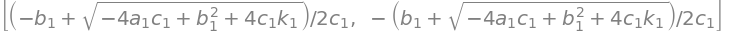

In [342]:
solve(a1 + b1*x + c1*x**2 - k1, x)

### poly3conv  

In [344]:
lltable_to_scale = scale_gx.subs(x, lltable_fx)

TypeError: Relational can not be used in Mul